Prototype for difference gradience assisted alignment.

Goal:
- If the user, or another module, can get alignment within ~10-30 pixels this will be able to solve it to pixel perfect.

In [1]:
from os.path import abspath
from sys import path
path.insert(0, abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.mis_file import MisFile,load_mis

mis_fp=r"..\..\example\data\set_a\mymis.mis"

In [15]:
mp=load_mis(mis_fp)

In [16]:
# ['a_myimages01.jpg', 'a_myimages02.jpg']
mp.check_image_paths()

{'a_myimages01.jpg': True,
 'a_myimages02.jpg': True,
 'a_myimages03.jpg': True,
 'a_myimages04.jpg': True,
 'a_myimages05.jpg': True,
 'a_myimages06.jpg': True,
 'a_myimages07.jpg': True,
 'a_myimages08.jpg': True,
 'a_myimages09.jpg': True,
 'a_myimages10.jpg': True}

In [23]:
from MISalign.canvas.canvas_solve import rectangular_solve
import MISalign.canvas.canvas_render as cr
from matplotlib import pyplot as plt
import numpy as np

In [17]:
relations=mp.get_rels('r')
image_names=mp.get_image_names()
origin="a_myimages01.jpg"
origin_relative_offsets=rectangular_solve(
    relations=relations,
    image_names=image_names,
    origin=origin
)
display(origin_relative_offsets)

{'a_myimages01.jpg': (0, 0),
 'a_myimages02.jpg': (12, -1088),
 'a_myimages03.jpg': (20, -2229),
 'a_myimages04.jpg': (-109, -3287),
 'a_myimages05.jpg': (-98, -4230),
 'a_myimages06.jpg': (-93, -5090),
 'a_myimages07.jpg': (-83, -6080),
 'a_myimages08.jpg': (-74, -7089),
 'a_myimages09.jpg': (-65, -8028),
 'a_myimages10.jpg': (-62, -8750)}

In [20]:
image_sizes=cr.find_image_sizes(mp.get_image_paths())
image_sizes

{'a_myimages01.jpg': (1600, 1200),
 'a_myimages02.jpg': (1600, 1200),
 'a_myimages03.jpg': (1600, 1200),
 'a_myimages04.jpg': (1600, 1200),
 'a_myimages05.jpg': (1600, 1200),
 'a_myimages06.jpg': (1600, 1200),
 'a_myimages07.jpg': (1600, 1200),
 'a_myimages08.jpg': (1600, 1200),
 'a_myimages09.jpg': (1600, 1200),
 'a_myimages10.jpg': (1600, 1200)}

ORO frame X and Y overlaps [20, 1491] [-3287, -3429]
A frame X and Y overlaps [0, 1471] [1058, 1200]
B frame X and Y overlaps [129, 1600] [0, 142]


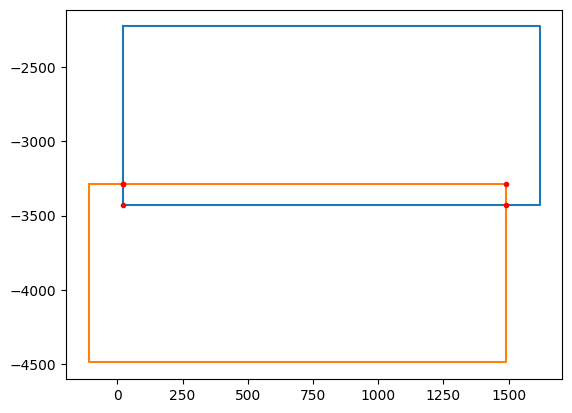

In [67]:
images_to_diff=['a_myimages03.jpg', 'a_myimages04.jpg']
img_a_oro=np.array(origin_relative_offsets[images_to_diff[0]])#Image A origin relative offset
img_a_size=image_sizes[images_to_diff[0]]#Image A Size
img_a_corners=[
    img_a_oro,
    img_a_oro+[0,-img_a_size[1]],
    img_a_oro+[img_a_size[0],-img_a_size[1]],
    img_a_oro+[img_a_size[0],0],
    ]
img_b_oro=np.array(origin_relative_offsets[images_to_diff[1]])#Image B origin relative offset
img_b_size=image_sizes[images_to_diff[1]]#Image B Size
img_b_corners=[
    img_b_oro,
    img_b_oro+[0,-img_b_size[1]],
    img_b_oro+[img_b_size[0],-img_b_size[1]],
    img_b_oro+[img_b_size[0],0],
    ]

img_a_set=np.array(img_a_corners+[img_a_corners[0]])
img_b_set=np.array(img_b_corners+[img_b_corners[0]])
plt.plot(img_a_set.T[0],img_a_set.T[1])
plt.plot(img_b_set.T[0],img_b_set.T[1])

#find overlap in ORO reference frame - subtract ORO of each image to get local coordinates.
image_a={
    "oro":origin_relative_offsets[images_to_diff[0]],
    "size":image_sizes[images_to_diff[0]]
}
image_b={
    "oro":origin_relative_offsets[images_to_diff[1]],
    "size":image_sizes[images_to_diff[1]]
}
x_positions=[image_a["oro"][0],image_a["oro"][0]+image_a["size"][0],image_b["oro"][0],image_b["oro"][0]+image_b["size"][0]]
x_positions.sort()
x_overlap=x_positions[1:3]
y_positions=[image_a["oro"][1],image_a["oro"][1]-image_a["size"][1],image_b["oro"][1],image_b["oro"][1]-image_b["size"][1]]
y_positions.sort(reverse=True)
y_overlap=y_positions[1:3]
print("ORO frame X and Y overlaps",x_overlap,y_overlap)
print("A frame X and Y overlaps",[x-image_a["oro"][0] for x in x_overlap],[-y+image_a["oro"][1] for y in y_overlap])
print("B frame X and Y overlaps",[x-image_b["oro"][0] for x in x_overlap],[-y+image_b["oro"][1] for y in y_overlap])



plt.plot([x_overlap[0],x_overlap[1],x_overlap[1],x_overlap[0],x_overlap[0]],[y_overlap[0],y_overlap[0],y_overlap[1],y_overlap[1],y_overlap[0]],"r.")
